In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd
#os.chdir('/content/drive/MyDrive/Colab Notebooks/dataset_processing')

Mounted at /content/drive


**1. dataset을 하나로 합치기**

In [2]:
'''
columns =[
        x_ev	y_ev	yaw_ev	vx_ev	vy_ev	
        x_tv	y_tv	yaw_tv	vx_tv	vy_tv	
        x_s1	y_s1	yaw_s1	vx_s1	vy_s1	
        x_s2	y_s2	yaw_s2	vx_s2	vy_s2	
        x_s3	y_s3	yaw_s3	vx_s3	vy_s3	
        x_s4	y_s4	yaw_s4	vx_s4	vy_s4	
        x_s5	y_s5	yaw_s5	vx_s5	vy_s5	
        x_s6	y_s6	yaw_s6	vx_s6	vy_s6
        ]
'''
#train_set
Total_train_length = 55  # train set을 총 55개 둔다고 하자.
Total_val_length = 10
Total_test_length = 25
N = Total_train_length + Total_val_length + Total_test_length #(N은 프로세싱에 사용되는 데이터 수)
###########################################################################
os.chdir('/content/drive/MyDrive/Colab Notebooks/degree1/') ### dir 수정함
path = '/content/drive/MyDrive/Colab Notebooks/degree1/'  ### path 수정함
file_list_degree1 = os.listdir(path)
print("프로세싱된 데이터 수 :", len(file_list_degree1))
## 수정한 코드
sample1 = pd.read_csv(path + file_list_degree1[0])
sample = sample1.to_numpy()
time_step = sample.shape[0]
num_of_features = sample.shape[1]

N_degree_train = [8,8,9,15,15]
N_degree_val = [2,2,2,2,2]
N_degree_test = [5,5,5,5,5]
path_list = ['/content/drive/MyDrive/Colab Notebooks/degree1/', '/content/drive/MyDrive/Colab Notebooks/degree2/', '/content/drive/MyDrive/Colab Notebooks/degree3/', '/content/drive/MyDrive/Colab Notebooks/degree4/', '/content/drive/MyDrive/Colab Notebooks/degree5/'] 


dataset_train = np.zeros((Total_train_length, time_step, num_of_features))
dataset_val = np.zeros((Total_val_length, time_step, num_of_features))
dataset_test = np.zeros((Total_test_length, time_step, num_of_features))
aa = 0
bb = 0
cc = 0

for a in range(len(N_degree_train)):
    os.chdir(path_list[a])
    path = path_list[a]
    print('path: ', path)
    file_list_degree = os.listdir(path)
    print('file_list_degree: ', file_list_degree)

    for i in range(N_degree_train[a]):
      data = pd.read_csv(path + file_list_degree[i])
      dataset_train[i+aa, :, :] = data.to_numpy()
      print("data.shape: ",data.shape)
    for j in range(N_degree_val[a]):
      data = pd.read_csv(path + file_list_degree[N_degree_train[a]+j])
      dataset_val[j+bb, :, :] = data.to_numpy()
    for k in range(N_degree_test[a]):
      data = pd.read_csv(path + file_list_degree[N_degree_train[a]+N_degree_val[a]+k])
      dataset_test[k+cc, :, :] = data.to_numpy()
    aa += N_degree_train[a]  
    bb += N_degree_val[a]  
    cc += N_degree_test[a]  
    
#    print("aa: ", aa)
#    print("bb: ", bb)
#    print("cc: ", cc)
###########################################################################
#print(dataset_train)
#print(dataset_val)
#print(dataset_test)
print(dataset_train.shape)
print(dataset_val.shape)
print(dataset_test.shape)



#print(dataset.shape)
#print(dataset)
#dataset_double = dataset+dataset
#print(dataset_double.shape) 
#print(dataset_double)

프로세싱된 데이터 수 : 22
path:  /content/drive/MyDrive/Colab Notebooks/degree1/
file_list_degree:  ['processing116.csv', 'processing12.csv', 'processing102.csv', 'processing131.csv', 'processing110.csv', 'processing54.csv', 'processing184.csv', 'processing167.csv', 'processing144.csv', 'processing86.csv', 'processing6.csv', 'processing61.csv', 'processing22.csv', 'processing73.csv', 'processing95.csv', 'processing174.csv', 'processing57.csv', 'processing2.csv', 'processing169.csv', 'processing87.csv', 'processing85.csv', 'processing18.csv']
data.shape:  (100, 40)
data.shape:  (100, 40)
data.shape:  (100, 40)
data.shape:  (100, 40)
data.shape:  (100, 40)
data.shape:  (100, 40)
data.shape:  (100, 40)
data.shape:  (100, 40)
path:  /content/drive/MyDrive/Colab Notebooks/degree2/
file_list_degree:  ['processing127.csv', 'processing139.csv', 'processing11.csv', 'processing1.csv', 'processing141.csv', 'processing74.csv', 'processing45.csv', 'processing157.csv', 'processing65.csv', 'processing186.csv'

**2. MinMaxScaler**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
dataset_Scaler = MinMaxScaler()
dataset_train_scale = np.zeros(dataset_train.shape)
dataset_val_scale = np.zeros(dataset_val.shape)
dataset_test_scale = np.zeros(dataset_test.shape)

for t in range(100):
    dataset_Scaler.fit(dataset_train[:, t, :])

for t in range(100):
    dataset_train_scale[:, t, :] = dataset_Scaler.transform(dataset_train[:, t, :])
    dataset_val_scale[:, t, :] = dataset_Scaler.transform(dataset_val[:, t, :])
    dataset_test_scale[:, t, :] = dataset_Scaler.transform(dataset_test[:, t, :])

In [5]:
x_train = dataset_train_scale[:, :60, :]
y_train = dataset_train_scale[:, 99, 5:7]
print("X_train shape :", x_train.shape) # X : 0~3초까지의 data (N, 60, num_of_features) 
print("Y_train shape :", y_train.shape) # Y : 충돌시간인 5초일 때 TV의 x, y 위치 (N, 2)

X_train shape : (55, 60, 40)
Y_train shape : (55, 2)


In [6]:
x_val = dataset_val_scale[:, :60, :]
y_val = dataset_val_scale[:, 99, 5:7]
print("x_val shape :", x_val.shape)
print("y_val shape :", y_val.shape)
#print(x_val)

x_val shape : (10, 60, 40)
y_val shape : (10, 2)


In [7]:
x_test = dataset_test_scale[:, :60, :]
y_test = dataset_test_scale[:, 99, 5:7]
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

x_test shape : (25, 60, 40)
y_test shape : (25, 2)


**3. LSTM Model Design**

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

feature = 40 # feature의 개수!!
timesteps = 60 #몇초전까지의 데이터를 넣을 것인지!
model = Sequential()
model.add(LSTM(80, return_sequences=True, input_shape = (timesteps,feature)))
model.add(Dropout(0.3))
model.add(LSTM(80, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(40))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 80)            38720     
                                                                 
 dropout (Dropout)           (None, 60, 80)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 80)            51520     
                                                                 
 dropout_1 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 40)                19360     
                                                                 
 dense (Dense)               (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 2)                 4

**4. Cross Validation & Learn Model**

In [9]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=N//2, verbose = 0)

[0.08480977267026901, 0.07434039562940598, 0.05940592661499977, 0.04439122602343559, 0.042357437312603, 0.03897389769554138, 0.0371948704123497, 0.03163239732384682, 0.03420130908489227, 0.023445462808012962, 0.01944180577993393, 0.018645577132701874, 0.017830099910497665, 0.014167003333568573, 0.01252980437129736, 0.011139769107103348, 0.010430872440338135, 0.009810971096158028, 0.00874063465744257, 0.008152984082698822, 0.00758630596101284, 0.005837843753397465, 0.00606192834675312, 0.005273044109344482, 0.005512813106179237, 0.00495779188349843, 0.005219463724642992, 0.0047223446890711784, 0.004188113380223513, 0.0035964571870863438, 0.003601034637540579, 0.0034033609554171562, 0.00304980855435133, 0.0028616823256015778, 0.0024309803266078234, 0.002642775420099497, 0.0021669233683496714, 0.0021052842494100332, 0.0023522113915532827, 0.0023104383144527674, 0.0021516550332307816, 0.0023069533053785563, 0.002086180727928877, 0.001971212215721607, 0.002264542505145073, 0.001693031750619

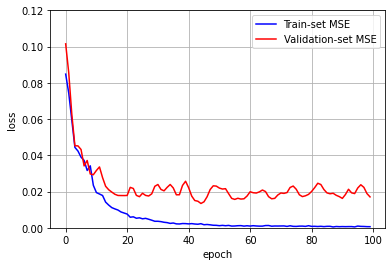

In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
#print(y_loss)
x_len = np.arange(len(y_loss))
plt.ylim(0, 0.12)
plt.plot(x_len, y_loss, c='blue', label="Train-set MSE")
plt.plot(x_len, y_vloss, c='red', label="Validation-set MSE")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**5. Model Metric**

In [11]:
from keras.metrics import MeanSquaredError, RootMeanSquaredError
from keras.metrics import MeanAbsoluteError, MeanSquaredLogarithmicError
from keras.metrics import CosineSimilarity, LogCoshError
from sklearn.metrics import r2_score

In [12]:
pred_test = model.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [13]:
mse = MeanSquaredError()
mse.update_state(pred_test, y_test)

rmse = RootMeanSquaredError()
rmse.update_state(pred_test, y_test)

mae = MeanAbsoluteError()
mae.update_state(pred_test, y_test)

msle = MeanSquaredLogarithmicError()
msle.update_state(pred_test, y_test)

cs = CosineSimilarity()
cs.update_state(pred_test, y_test)

lce = LogCoshError()
lce.update_state(pred_test, y_test)

r2 = r2_score(y_test, pred_test)

In [14]:
print("MSE :", mse.result().numpy())
print("RMSE :", rmse.result().numpy())
print("MAE :", mae.result().numpy())
print("MSLE :", msle.result().numpy())
print("CosineSimilarity :", cs.result().numpy())
print("LogCoshError :", lce.result().numpy())
print("R2 Score :", r2)

MSE : 0.009666574
RMSE : 0.09831874
MAE : 0.06994999
MSLE : 0.00533454
CosineSimilarity : 0.9801263
LogCoshError : 0.0047972775
R2 Score : 0.8410378177389396
